<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Logo_exactas.svg/800px-Logo_exactas.svg.png" alt="Logo Exactas UBA" style="width:100px;">
<img src="
https://ic.fcen.uba.ar/images/logo.png" alt="Logo Instituto de Cálculo" style="width:100px;">

# **TP 1: SUBE-2023** 



### Participantes: Joaquín Koifman y Tobías Palacín Roitbarg

## Procesamiento de datos

In [1]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [2]:
# Leer dataset y ver las primeras filas
datos_sube_2023 = pd.read_csv("sube-2023.csv")
datos_sube_2023.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


#### **1. a)** Transformar la columna `DIA_TRANSPORTE` para que sea reconocida como una fecha.

In [3]:
sube_2023=datos_sube_2023.rename(columns={"DIA_TRANSPORTE" : "FECHA"}) # Renombrar la columna por comodidad
sube_2023['FECHA'] = pd.to_datetime(sube_2023['FECHA']) # Aplicar el cambio del tipo de dato sobre la columna correspondiente con la librería datetime
sube_2023['FECHA'].dtype # Corroboramos por consola que se trata del tipo M8, que es otra forma de llamarle al tipo datetime64

dtype('<M8[ns]')

#### **b)** Agregar tres columnas al DataFrame:
* `FECHA_DIA`
* `FECHA_ORDINAL`
* `FECHA_MES`

In [4]:
sube_2023["DIA_TRANSPORTE"] = sube_2023["FECHA"].dt.strftime('%a').str[:3]

sube_2023["FECHA_ORDINAL"] = sube_2023["FECHA"].dt.dayofyear

sube_2023["FECHA_MES"] = sube_2023["FECHA"].dt.strftime('%m')

sube_2023.head()

,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,DIA_TRANSPORTE,FECHA_ORDINAL,FECHA_MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1,01
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1,01
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1,01
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1,01
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1,01


#### **2.**  Crear el DataFrame `datos_amba`


In [5]:
datos_amba = sube_2023.loc[(sube_2023["AMBA"] == "SI") & (sube_2023["DATO_PRELIMINAR"]== "NO")] # Filtrar para obtener el DataFrame con las restricciones pedidas
datos_amba = datos_amba[["FECHA","DIA_TRANSPORTE","FECHA_MES","FECHA_ORDINAL","JURISDICCION","LINEA","CANTIDAD","TIPO_TRANSPORTE"]] # Quedarse con las columnas de interés
datos_amba = datos_amba.rename(columns={"CANTIDAD": "pasajeros","DIA_TRANSPORTE":"fecha_dia"}) # Renombrar columnas con nombres más descriptivos
datos_amba.columns = datos_amba.columns.str.lower() # Aplicar .lower() a todas las columnas para que sean iguales a las del DataFrame de salida
datos_amba.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Sun,01,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Sun,01,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Sun,01,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


#### **3. a)** Identificar la proporción de la cantidad total anual de pasajeros que le corresponde a cada medio de transporte



In [6]:
pasajeros_por_transporte = datos_amba.groupby("tipo_transporte")["pasajeros"].sum()

total_pasajeros = pasajeros_por_transporte.sum()

proporcion_pasajeros_por_transporte = pasajeros_por_transporte / total_pasajeros

print("Proporción de la cantidad total anual de pasajeros por tipo de transporte:")
print(proporcion_pasajeros_por_transporte)

Proporción de la cantidad total anual de pasajeros por tipo de transporte:
tipo_transporte
COLECTIVO    0.837645
SUBTE        0.068097
TREN         0.094258
Name: pasajeros, dtype: float64


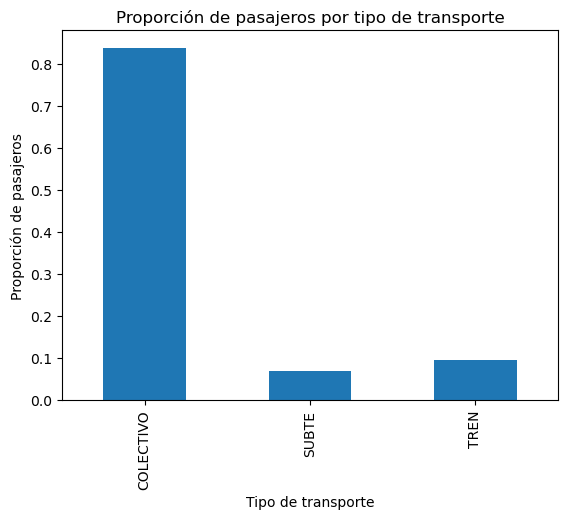

In [7]:
fig, ax = plt.subplots()

proporcion_pasajeros_por_transporte.plot(kind='bar', ax=ax)

ax.set_title('Proporción de pasajeros por tipo de transporte')
ax.set_xlabel('Tipo de transporte')
ax.set_ylabel('Proporción de pasajeros')

plt.show()

**b)** Identificar la tupla `(mes, línea de subte)` donde viajó la mayor cantidad de pasajeros.

In [8]:
datos_subte = datos_amba.loc[datos_amba["tipo_transporte"] == "SUBTE",:]

pasajeros_por_mes_y_linea = datos_subte.groupby(["fecha_mes", "linea"])["pasajeros"].sum()

mayor_cantidad_pasajeros = pasajeros_por_mes_y_linea.idxmax()

print("La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros es:", mayor_cantidad_pasajeros)

La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros es: ('08', 'LINEA_B')


**c)** Identificar el día hábil con menos concurrencia en el transporte público.

In [12]:
dias_habiles = datos_amba.loc[(datos_amba["fecha_dia"] != "Sun") & (datos_amba["fecha_dia"] != "Sat"),:]

pasajeros_por_dia = dias_habiles.groupby("fecha_dia")["pasajeros"].std()

dia_con_menor_concurrencia = pasajeros_por_dia.idxmin()

cantidad_de_pasajeros = dias_habiles[dias_habiles["fecha_dia"] == dia_con_menor_concurrencia]["pasajeros"].sum()

print("El dia habil con menos concurencia en el transporte publico es", dia_con_menor_concurrencia, "con", cantidad_de_pasajeros, "pasajeros")

El dia habil con menos concurencia en el transporte publico es Mon con 540161948 pasajeros


Text(0, 0.5, 'Cantidad de pasajeros')

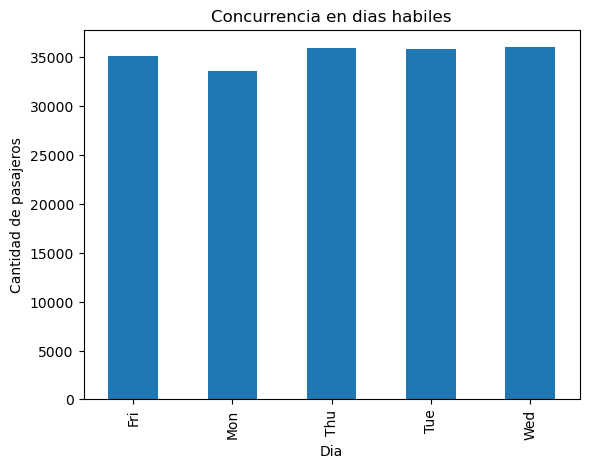

In [13]:
fig, ax = plt.subplots()

pasajeros_por_dia.plot(kind='bar', ax=ax)

ax.set_title('Concurrencia en dias habiles')
ax.set_xlabel('Dia')
ax.set_ylabel('Cantidad de pasajeros')

# Análisis Exploratorio

## **4**


/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

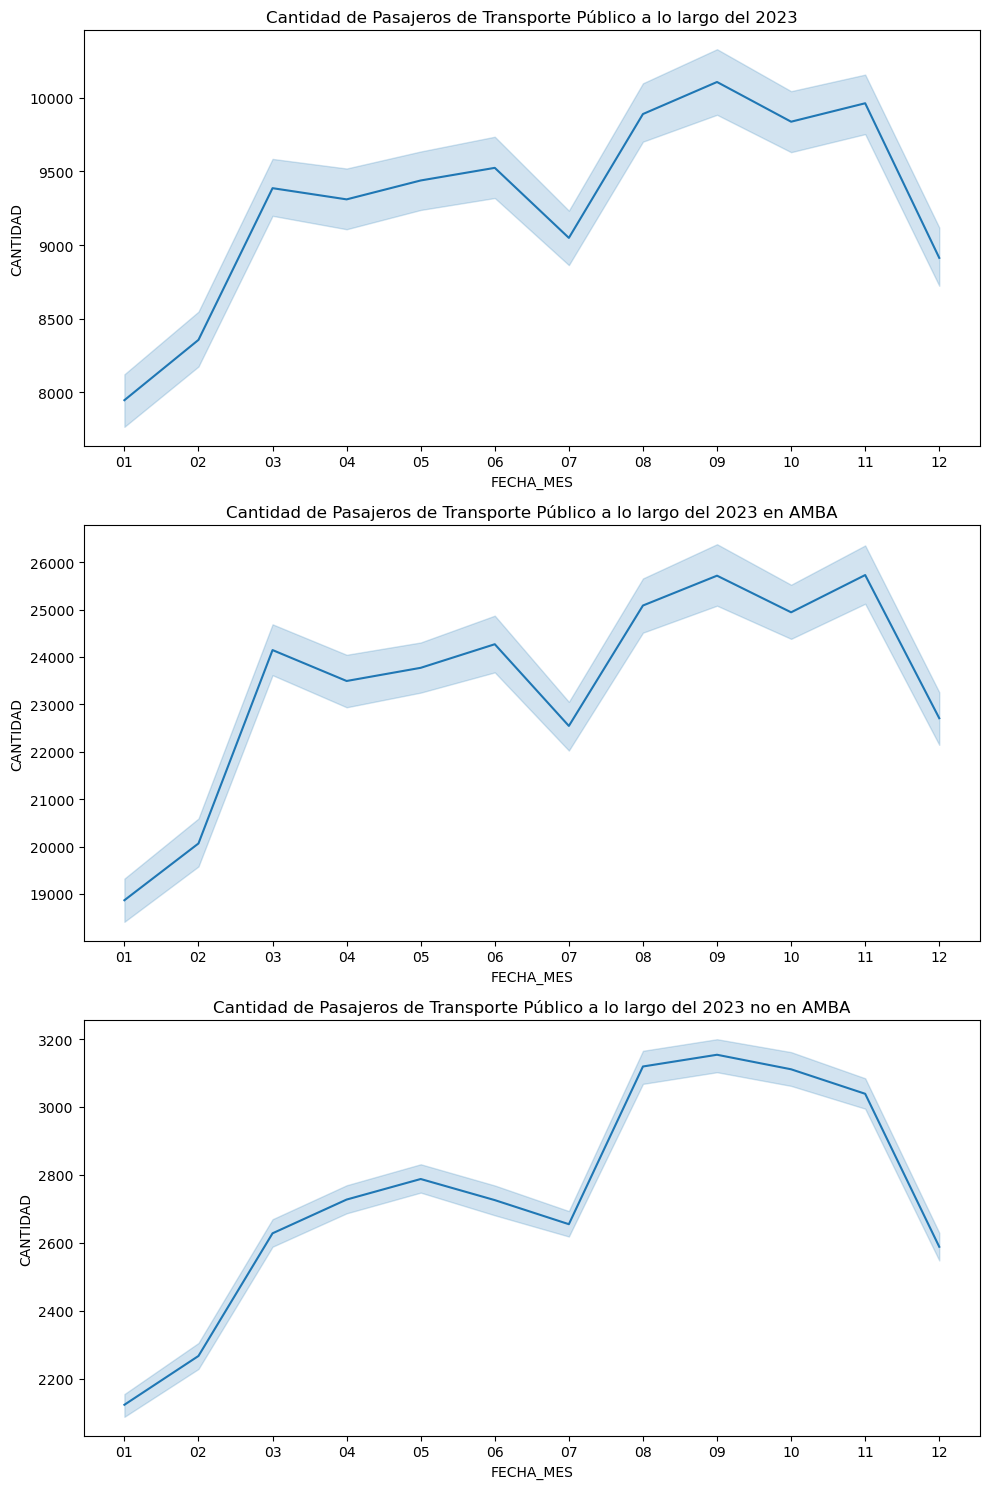

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

sns.lineplot(data=sube_2023, x='FECHA_MES', y='CANTIDAD', ax=axs[0])
axs[0].set_title('Cantidad de Pasajeros de Transporte Público a lo largo del 2023')
sns.lineplot(data=sube_2023[sube_2023['AMBA'] == 'SI'], x='FECHA_MES', y='CANTIDAD', ax=axs[1])
axs[1].set_title('Cantidad de Pasajeros de Transporte Público a lo largo del 2023 en AMBA')
sns.lineplot(data=sube_2023[sube_2023['AMBA'] == 'NO'], x='FECHA_MES', y='CANTIDAD', ax=axs[2])
axs[2].set_title('Cantidad de Pasajeros de Transporte Público a lo largo del 2023 no en AMBA')

plt.tight_layout()

plt.show()

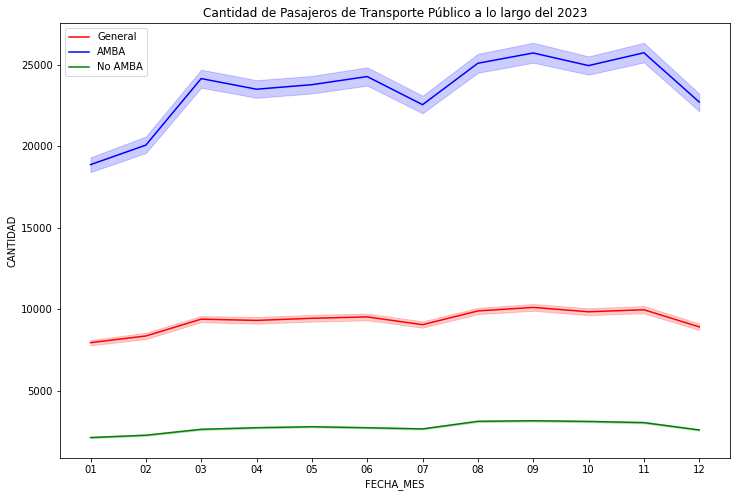

In [55]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=sube_2023, x='FECHA_MES', y='CANTIDAD', color='red', label='General')
sns.lineplot(data=sube_2023[sube_2023['AMBA'] == 'SI'], x='FECHA_MES', y='CANTIDAD', color='blue', label='AMBA')
sns.lineplot(data=sube_2023[sube_2023['AMBA'] == 'NO'], x='FECHA_MES', y='CANTIDAD', color='green', label='No AMBA')

plt.title('Cantidad de Pasajeros de Transporte Público a lo largo del 2023')
plt.legend()

plt.show()

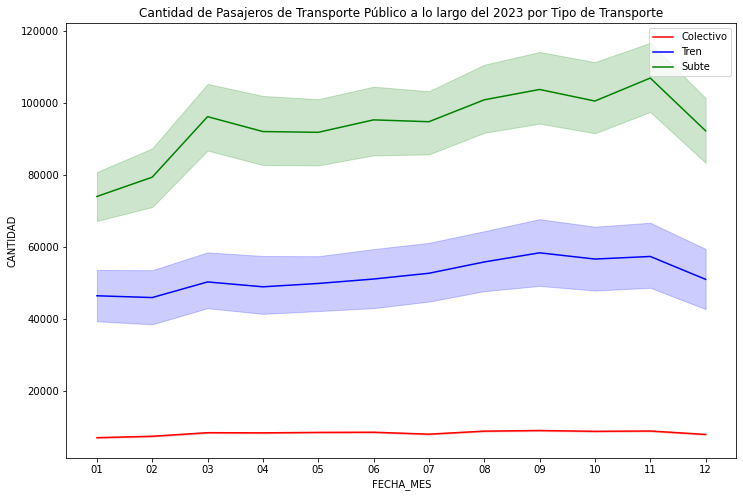

In [56]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'COLECTIVO'], x='FECHA_MES', y='CANTIDAD', color='red', label='Colectivo')
sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'TREN'], x='FECHA_MES', y='CANTIDAD', color='blue', label='Tren')
sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'SUBTE'], x='FECHA_MES', y='CANTIDAD', color='green', label='Subte')

plt.title('Cantidad de Pasajeros de Transporte Público a lo largo del 2023 por Tipo de Transporte')
plt.legend()

plt.show()

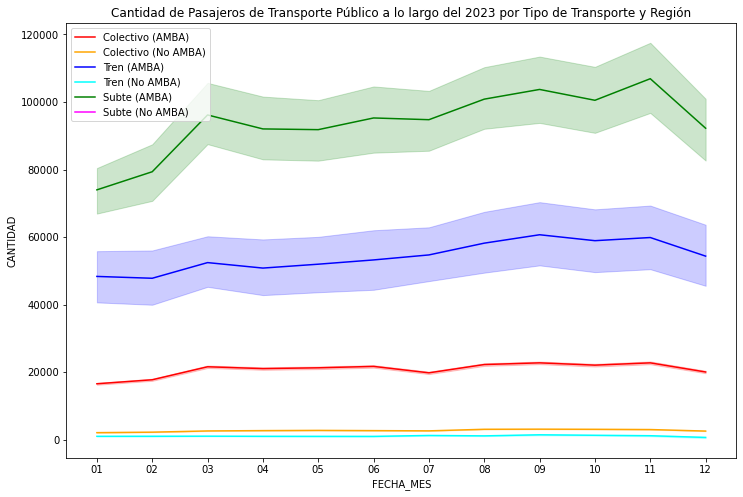

In [57]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=sube_2023[(sube_2023['TIPO_TRANSPORTE'] == 'COLECTIVO') & (sube_2023['AMBA'] == 'SI')], x='FECHA_MES', y='CANTIDAD', color='red', label='Colectivo (AMBA)')
sns.lineplot(data=sube_2023[(sube_2023['TIPO_TRANSPORTE'] == 'COLECTIVO') & (sube_2023['AMBA'] == 'NO')], x='FECHA_MES', y='CANTIDAD', color='orange', label='Colectivo (No AMBA)')
sns.lineplot(data=sube_2023[(sube_2023['TIPO_TRANSPORTE'] == 'TREN') & (sube_2023['AMBA'] == 'SI')], x='FECHA_MES', y='CANTIDAD', color='blue', label='Tren (AMBA)')
sns.lineplot(data=sube_2023[(sube_2023['TIPO_TRANSPORTE'] == 'TREN') & (sube_2023['AMBA'] == 'NO')], x='FECHA_MES', y='CANTIDAD', color='cyan', label='Tren (No AMBA)')
sns.lineplot(data=sube_2023[(sube_2023['TIPO_TRANSPORTE'] == 'SUBTE') & (sube_2023['AMBA'] == 'SI')], x='FECHA_MES', y='CANTIDAD', color='green', label='Subte (AMBA)')
sns.lineplot(data=sube_2023[(sube_2023['TIPO_TRANSPORTE'] == 'SUBTE') & (sube_2023['AMBA'] == 'NO')], x='FECHA_MES', y='CANTIDAD', color='magenta', label='Subte (No AMBA)')

plt.title('Cantidad de Pasajeros de Transporte Público a lo largo del 2023 por Tipo de Transporte y Región')
plt.legend()

plt.show()

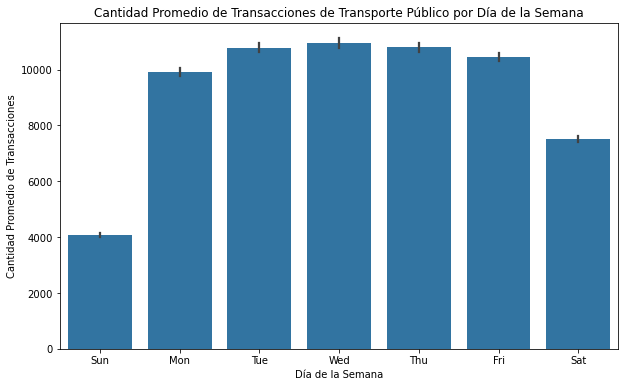

In [36]:
plt.figure(figsize=(10, 6))

sns.barplot(data=sube_2023, x='DIA_TRANSPORTE', y='CANTIDAD')

plt.title('Cantidad Promedio de Transacciones de Transporte Público por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Promedio de Transacciones')

plt.show()

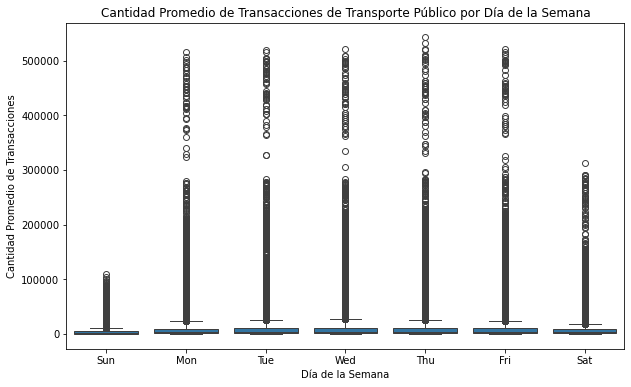

In [39]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=sube_2023, x='DIA_TRANSPORTE', y='CANTIDAD')

plt.title('Cantidad Promedio de Transacciones de Transporte Público por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Promedio de Transacciones')

plt.show()